# Figure 1: del Molino et al, eLife 2017

This is a reproduction of del Molino et al. 2017 using NeuroML2/LEMS


## Microcircuit Conenctivity

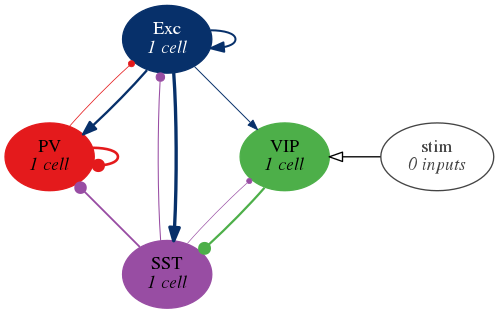

In [1]:
from IPython.display import Image
Image("../NeuroML/Fig1/Fig1a.png")

## Low Baseline Activity

pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/LEMS_RateBased_low_baseline.xml (/Users/jessica/Dropbox/GSoC/code/NeuroML/LEMS_RateBased_low_baseline.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/code/notebooks
pyNeuroML >>> Reloading: Data loaded from ./rates_low.dat (jNeuroML)


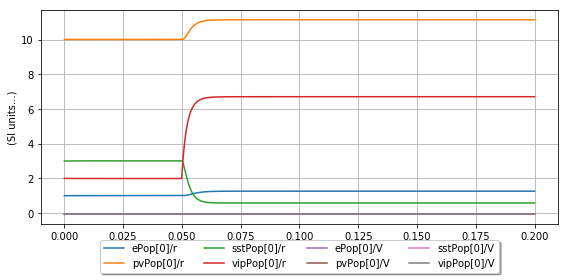

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline  
from pyneuroml import pynml

low_lems_file='../NeuroML/LEMS_RateBased_low_baseline.xml'
low_results = pynml.run_lems_with_jneuroml(low_lems_file, nogui=True, load_saved_data=True, plot=True)

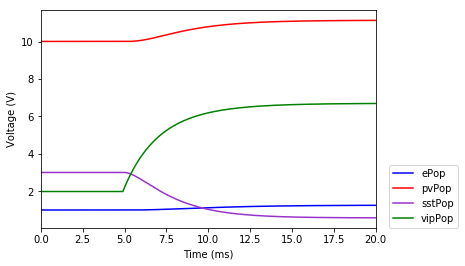

In [60]:
# reproduce Fig 1c - Low Baseline activity

# t=0 corresponds to the time point of the modulatory input
T = max(low_results['t']) * 1000
timeLine = [t * 1000 - T/4 + 5 for t in results['t']]
plt.plot(timeLine, low_results['ePop[0]/r'], label='ePop', color='blue')
plt.plot(timeLine, low_results['pvPop[0]/r'], label='pvPop', color='red')
plt.plot(timeLine, low_results['sstPop[0]/r'], label='sstPop', color='darkorchid')
plt.plot(timeLine, low_results['vipPop[0]/r'], label='vipPop', color='green')

plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.xlim(xmin=0, xmax=20)
plt.legend(loc=(1.04,0))

## High Baseline Activity

pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/LEMS_RateBased_high_baseline.xml (/Users/jessica/Dropbox/GSoC/code/NeuroML/LEMS_RateBased_high_baseline.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/code/notebooks
pyNeuroML >>> Reloading: Data loaded from ./rates_high.dat (jNeuroML)


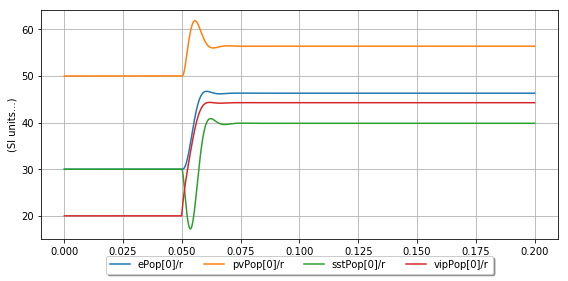

In [62]:
high_lems_file='../NeuroML/LEMS_RateBased_high_baseline.xml'
high_results = pynml.run_lems_with_jneuroml(high_lems_file, nogui=True, load_saved_data=True, plot=True)

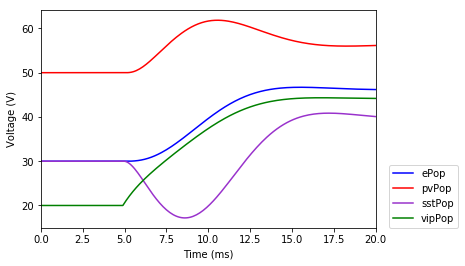

In [63]:
# reproduce Fig 1c - Low Baseline activity

# t=0 corresponds to the time point of the modulatory input
T = max(results['t']) * 1000
timeLine = [t * 1000 - T/4 + 5 for t in results['t']]
plt.plot(timeLine, high_results['ePop[0]/r'], label='ePop', color='blue')
plt.plot(timeLine, high_results['pvPop[0]/r'], label='pvPop', color='red')
plt.plot(timeLine, high_results['sstPop[0]/r'], label='sstPop', color='darkorchid')
plt.plot(timeLine, high_results['vipPop[0]/r'], label='vipPop', color='green')

plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.xlim(xmin=0, xmax=20)
plt.legend(loc=(1.04,0))

## f-I Curve

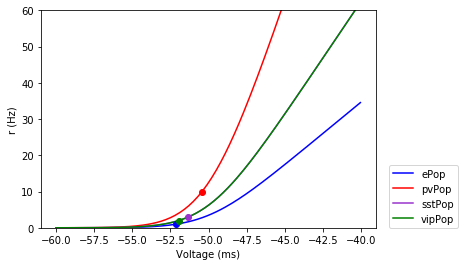

In [64]:
import numpy as np

def calculate_phi(Vss, Vth, Vr):
    tau = np.array([[0.0288], [0.0080], [0.0160], [0.0160]])
    sV = np.ones((4, 1)) # noise (mV)

    '''This calculates the average rate of each population'''
    return (Vss - Vth) / (tau * (Vth - Vr) * (1 - np.exp(-(Vss - Vth) /sV)))

Vr_min = -60 # mV
Vr_max = -40 # mV
Vth = -50
V0 = np.array([[-52.1261], [-50.4308], [-51.3239], [-51.9664]])
r0 = np.array([[1], [10], [3], [2]])

V_Vec = np.arange(Vr_min, Vr_max, 0.15)
rr = np.zeros((len(V_Vec), 4))
for idx, VV in enumerate(V_Vec):
    VV_pop = np.ones((4,1)) * VV
    rr[idx, :] = calculate_phi(VV_pop, Vth, Vr_min).ravel()
    
plt.plot(V_Vec, rr[:, 0], label='ePop', color='blue')
plt.plot(V_Vec, rr[:, 1], label='pvPop', color='red')
plt.plot(V_Vec, rr[:, 2], label='sstPop', color='darkorchid')
plt.plot(V_Vec, rr[:, 3], label='vipPop', color='green')

# plot markers
plt.plot(V0[0], r0[0], 'o', color='blue')
plt.plot(V0[1], r0[1], 'o', color='red')
plt.plot(V0[2], r0[2], 'o', color='darkorchid')
plt.plot(V0[3], r0[3], 'o', color='green')

plt.plot()
plt.xlabel('Voltage (ms)')
plt.ylabel('r (Hz)')
plt.ylim(ymin=0, ymax=60)
plt.legend(loc=(1.04,0))
